In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import fmin
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/ex2data1.txt', sep=',', header=0)
df.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


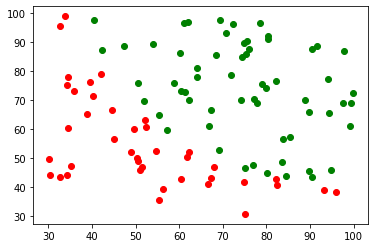

In [3]:
plt.scatter(df.loc[df['y'] == 1, 'x1'], df.loc[df['y'] == 1, 'x2'], color='g') # true data
plt.scatter(df.loc[df['y'] == 0, 'x1'], df.loc[df['y'] == 0, 'x2'], color='r')

In [4]:
def sigmoid(z):
    return (1 / (1 + np.power(np.e, -z)))

In [5]:
def h_of_theta(X, theta):
    return sigmoid(np.dot(theta.T, X))

In [6]:
theta = np.array([0, 0, 0])
y = df['y']
X = df.drop(columns=['y'])
X['x0'] = np.ones(X.shape[0])
X = X[['x0', 'x1', 'x2']]
X.head()

,x0,x1,x2
0,1.0,34.623660,78.024693
1,1.0,30.286711,43.894998
2,1.0,35.847409,72.902198
3,1.0,60.182599,86.308552
4,1.0,79.032736,75.344376


In [7]:
def J_of_theta(theta, x_i, y_i):
    return (-y_i * np.log(h_of_theta(x_i, theta))) - ((1 - y_i) * np.log(1 - h_of_theta(x_i, theta)))

In [8]:
def cost_function(theta, X, y):
    result = []
    for (idx, x_i), y_i in zip(X.iterrows(), y):
        result.append(J_of_theta(theta, x_i, y_i))

    return (1 / X.shape[0]) * np.sum(result)

In [9]:
# Once you are done, ex2.m will call your costFunction using the initial
# parameters of θ. You should see that the cost is about 0.693.

cost_function(theta, X, y)

0.6931471805599453

In [10]:
# Once fminunc completes, ex2.m will call your costFunction function
# using the optimal parameters of θ. You should see that the cost is about
# 0.203.
result = fmin(cost_function, theta, args=(X, y))
result

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


array([-25.16130062,   0.20623142,   0.20147143])

In [11]:
theta = np.array([-25.16130062,   0.20623142,   0.20147143])

In [13]:
#  For a student with an Exam 1 score
# of 45 and an Exam 2 score of 85, you should expect to see an admission
# probability of 0.776.

example_X = [1., 45., 85,]
h_of_theta(example_X, theta)

0.7762916043915242